In [12]:
import pandas as pd
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from PIL import Image, ImageDraw
import cv2
import glob

csv_path = './point_csv/0623_1254_sample1_full.csv'

def csv2array(csv_path):

    test = pd.read_csv(csv_path)

    col = test.columns.tolist()

    # 문자열로 되어있는 값들을 벗겨내기
    for c in col:
        test[c] = test[c].apply(lambda x : literal_eval(x))

    num=0
    arr_name = []

    print('----------csv to array -------------')
    # 프레임 별 array 생성 
    for i in tqdm(range(len(test))):
        # 전역변수로 변수명을 'arr_ + 프레임 no' 선언 
        globals()[f'arr_{num}'] = []
        arr_name.append(f'arr_{num}')

        for c in col:
            if test.loc[i][c] != 0:
                # x, y 값을 array에 담고, 리스트에 append
                new_arr = np.array([test.loc[i][c]['x'], test.loc[i][c]['y']])
                globals()[f'arr_{num}'].append(new_arr)
            else:
                new_arr = np.array([test.loc[i][c], test.loc[i][c]])
                globals()[f'arr_{num}'].append(new_arr)
        # 21개의 좌표가 담긴 각각의 array를 하나의 array로 => Frame 별 array 생성
        globals()[f'arr_{num}'] = np.array(globals()[f'arr_{num}'])

        num += 1
    
    return arr_name

def hand_connection():

    palm = ((0, 1), (0, 5), (9, 13), (13, 17), (5, 9), (0, 17))

    thumb = ((1, 2), (2, 3), (3, 4))

    index = ((5, 6), (6, 7), (7, 8))

    middle = ((9, 10), (10, 11), (11, 12))

    ring = ((13, 14), (14, 15), (15, 16))

    pinky = ((17, 18), (18, 19), (19, 20))

    hand_list = [palm, thumb, index, middle, ring, pinky]
    
    return hand_list

def array2img():

    arr_name = csv2array(csv_path)

    draw_path = './pillow_img/'

    if os.path.exists(draw_path):
        for file in os.scandir(draw_path):
            os.remove(file.path)
    else:
        os.mkdir(draw_path)

    height = 1000
    width = 1000

    num = 0
    # 손꾸락 색깔 (살색)
    rgb = (232, 196, 126)
    # RGB 초기값
    color = 255

    mode = 0

    print('----------array to image-------------')

    for i in tqdm(range(int(len(arr_name) / 2))):

        image = Image.new(mode='RGB', size=(height, width), color=(255, 255, 255))

        draw = ImageDraw.Draw(image, 'RGB')

        a = 10
            
        while a != 2000:
            x = a - 10
            y = 0
            for _ in range(a):
                draw.rectangle([(x, y), (x+10, y+10)], fill=(color, 255, 255), width=0)
                x -= 10
                y += 10
            a += 10

            # RGB 값 끝에 다다를 때 mode 변환
            if color == 150 :
                mode = 1
            elif color == 255:
                mode = 0

            # mode 별로 RGB 값을 + 할지 - 할지 고려
            if mode == 0:
                color -= 1
            elif mode == 1:
                color += 1
        
            
        # 좌표 값 그리기
        for idx in range(42):

            p = np.trunc(np.multiply(eval(arr_name[i])[idx], np.array([1000, 1000])))
                
            x,y = p
            x1 = x - (x % 10)
            x2 = x1 + 10

            y1 = y - (y % 10)
            y2 = y1 + 10

            draw.rectangle([(x1, y1), (x2, y2)], fill=rgb)
        
        num += 1


        plt.figure(figsize=(20,10))
        plt.axis('off')
        plt.imshow(image)
        plt.savefig(draw_path + 'test_'+ str(num) +'.png')
        plt.close()
        
        del draw


def img2avi():

    array2img()
    mp4_name = input('저장할 파일명을 적어주세요')
    img_array = []

    print('------ image to avi file ... ----------')
    for filename in tqdm(glob.glob(os.getcwd() + '/pillow_img/*.png')):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width, height)
        img_array.append(img)

    out = cv2.VideoWriter(mp4_name + '.avi', cv2.VideoWriter_fourcc(*'DIVX'), 30, size)

    for i in tqdm(img_array):
        out.write(i)
    out.release()

In [13]:
img2avi()

----------csv to array -------------


100%|██████████| 3813/3813 [00:21<00:00, 180.69it/s]


----------array to image-------------


 63%|██████▎   | 1197/1906 [07:09<04:14,  2.79it/s]

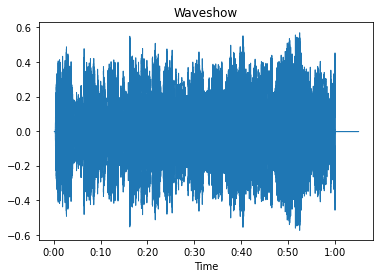

In [217]:
import librosa
import librosa.display
import matplotlib.pyplot as plt         # 그래프를 출력하기 위한 모듈

audio = 'sample.wav'
y, sr = librosa.load(audio)             # 소리 파일 불러오기

librosa.display.waveshow(y, sr=sr)      # 소리 데이터를 그래프로 표현하기
plt.title('Waveshow')                   # 그래프 제목 설정하기   
plt.show()

In [212]:
# 모듈 로딩 후 오디오 추출
import moviepy.editor as mp

clip = mp.VideoFileClip("sample1.mp4")
clip.audio.write_audiofile("sample.wav")

MoviePy - Writing audio in sample.wav


MoviePy - Done.
